In [ ]:
print("Author: Lauren Blakeley")
print("\nPredicting Lung Cancer Using Primarily Binary Variables")


In [ ]:
##Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from xgboost import XGBClassifier
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Exploratory Data Analysis


##Read in Data
df = pd.read_csv('C:/Users/Lauren/OneDrive/DSC_478/Final_Project/lung_cancer_dataset.csv')

##Check first few rows
print(df.head())

##Check for null values 
print(df.isnull().sum())
##There are no null values in any of the columns

##Check data types of variables
print(df.dtypes)
##Only two fields are not of data type int64, gender and lung_cancer. They are of type object. Gender has the values 'M' and 'F' to represent male and female. Lung_cancer has 
# values 'YES' and 'NO' to represent the existence or absence of lung cancer. 

##Check the number of unique values in each field
print(df.nunique())
##Out of the 15 idependent (explanatory) variables, only 1 (Age) had more than 2 unique values. This makes sense as every other variable is binary with 1 (absence of symptom) 
# or 2 (presence of symptom).

##Review the general statistics for the different variables
print( df.describe())
##Most variables are binary with 1 or 2 being the only value options, but interestingly enough the average for these binary variables, the average (mean score) for all symtoms
# was very close to, if not 1.5, which indicates the representation of the symptoms per observation is split about 50/50 in the data. This indicates a possibility that
# while certain symptoms may be better at indicating whether a person actually has lung cancer or not, a specific combination of present symptoms may actually be more powerful.
# This observation supports the logic that, in the case of most diagnostic efforts, it is the constitution of symptoms that lead to a diagnosis, rather than the isolated presence
# of one given symptom.


##Creating histograms for all numerical fields to observe distributions
for column in df.select_dtypes(include=['number']).columns:  
    plt.figure(figsize=(6, 4))  
    plt.hist(df[column], bins=20, edgecolor='black')  
    plt.title(f"Histogram of {column}")  
    plt.xlabel(column)  
    plt.ylabel("Frequency") 
    plt.grid(True)  
    plt.show()
##I created historgrams for all numericals fields to observe how the data is distributed. Primarily, I was concerned with the field 'age' as it is the only one that is not 
# binary. The distribution of age is not normal, and appears more uniform if anything, but also there is no trend in age range. I am going to keep this in mind in case transformation
# needs to be done on the age veriable so that it can be a potential input in building a predictive model. Also, not only is the presence vs. absence of lung cancer balanced, 
# It appears whether a symptom is present or not is also fairly equal amongst all binary features in the dataset.


##Here I am recoding Gender so that it is binary
df['GENDER'] = df['GENDER'].replace({'M': 0, 'F': 1})

##After recoding Gender, I was concerned that the binary columns with values of 1 and 2 would allow a model to assume ordinality, so I recoded to 0 and 1 where 0 now represents 
# the absence of a symptom while 1 represents the presence of a symptom.
binary_cols = [col for col in df.columns if col not in ['AGE', 'GENDER', 'LUNG_CANCER']]

df[binary_cols] = df[binary_cols].map(lambda x: 1 if x == 2 else 0)

##Now I am recoding the lung_cancer values so NO is equal to 0 (absence of) and YES is equal to 1 (presence of). I was concerned with inconsistent labelling and how that may
# impact the ability to model the data.
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

##I am printing the head of the data now to see if the changes I made were applied properly.
print(df.head())


 The selected features are: ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']

Model Performance without Interaction Terms: 
Accuracy: 0.51 
Precision: 0.52 
Recall: 0.55 
AUC: 0.52


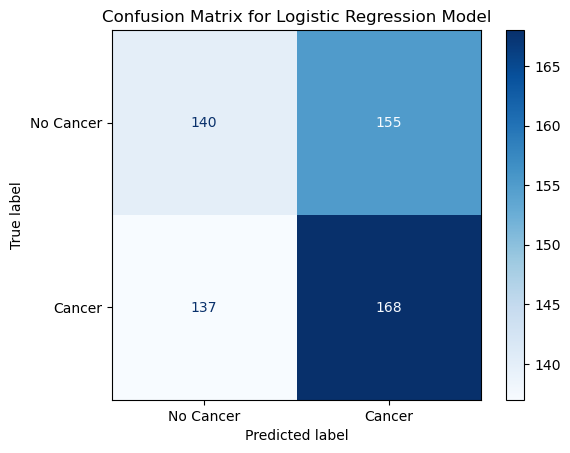

In [ ]:
# Basic Logistic Regression Model


##Here I am separating the features
X = df.drop(columns=['LUNG_CANCER'])  
y = df['LUNG_CANCER']  


##Now I am splitting the data into train and test states, using random_state to set a seed for reproducibility. I picked 15 because it is my favorite number and inconsequential.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

##This line of code initializes the logistic regression model, setting max_iter to 1000 instead of the default 100 to avoid convergence warning.
logreg = LogisticRegression(max_iter=1000)

##Now I am applying Recursive Feature Elimination (RFE) to select top 10 features, originally I did the top 5 but the accuracy, precision, and recall for the model was poor.
rfe = RFE(estimator=logreg, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

##Here I am getting the feature names
selected_features = X.columns[rfe.support_].tolist()

##Now I am training the logistic regression model on selected features
logreg.fit(X_train_rfe, y_train)

#Here I am making predictions
y_pred = logreg.predict(X_test_rfe)

#Now I am evaluating the model performance and storing accuracy, precision, recall, and auc results in variables.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
auc = roc_auc_score(y_test, logreg.predict_proba(X_test_rfe)[:, 1])

##Now I am displaying the results
print( f"\n The selected features are: {selected_features}")
print(f"\nModel Performance without Interaction Terms: \nAccuracy: {accuracy:.2f} \nPrecision: {precision:.2f} \nRecall: {recall:.2f} \nAUC: {auc:.2f}")

##Here I am displaying a confusion matrix to visualize the correctly classified and misclassified cases.
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Cancer", "Cancer"])
disp.plot(cmap="Blues", values_format="d")  # "Blues" for a better visual effect

plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()

In [ ]:
# Logistic Regression Model with Interaction Terms

##Separating features and target variables
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

##Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

##Generating Interaction Terms without polynomials
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_inter = interaction.fit_transform(X_train)
X_test_inter = interaction.transform(X_test)

##Now I am converting to a DataFrame with proper feature names
feature_names = interaction.get_feature_names_out(X.columns)
X_train_inter_df = pd.DataFrame(X_train_inter, columns=feature_names)
X_test_inter_df = pd.DataFrame(X_test_inter, columns=feature_names)

##Feature Selection: Select Top 10 Interaction Features using Chi-Squared
selector = SelectKBest(score_func=chi2, k=10)
X_train_selected = selector.fit_transform(X_train_inter_df, y_train)
X_test_selected = selector.transform(X_test_inter_df)

##Geting selected feature names
selected_features = X_train_inter_df.columns[selector.get_support()]
print("Selected Interaction Features:\n", selected_features)

##Training logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_selected, y_train)

##Making predictions
y_pred_inter = logreg.predict(X_test_selected)

##Evaluating performance and storing statistics in appropriately named variables
accuracy_inter = accuracy_score(y_test, y_pred_inter)
precision_inter = precision_score(y_test, y_pred_inter, pos_label=1)
recall_inter = recall_score(y_test, y_pred_inter, pos_label=1)
auc_inter = roc_auc_score(y_test, logreg.predict_proba(X_test_selected)[:, 1])

# Display results
print(f"\nModel Performance with Interaction Terms:")
print(f"Accuracy: {accuracy_inter:.2f}, Precision: {precision_inter:.2f}, Recall: {recall_inter:.2f}, AUC: {auc_inter:.2f}")


##Even with including interaction terms, this logistic regression model is not- with any level of significance- better at predicting the absence or presence of lung cancer
# based on the symptoms provided. The most significant improvement was to recall, which represents the number of true positives/ true positives + false negatives. The higher
# the recall, the fewer the number of false negatives, which means the fewer the number of misclassified positive cases. In my opinion, if I have to pick whether accuracy, 
# precision, or recall is the best for a model that is supposed to predict the presence of lung cancer, I want to emphasize recall is the most important statistic to me overall.

Selected Interaction Features:
 Index(['AGE YELLOW_FINGERS', 'AGE PEER_PRESSURE', 'AGE CHRONIC_DISEASE',
       'AGE FATIGUE', 'AGE WHEEZING', 'AGE ALCOHOL_CONSUMING', 'AGE COUGHING',
       'AGE SHORTNESS_OF_BREATH', 'AGE SWALLOWING_DIFFICULTY',
       'AGE CHEST_PAIN'],
      dtype='object')

Model Performance with Interaction Terms:
Accuracy: 0.53, Precision: 0.52, Recall: 0.60, AUC: 0.53


In [ ]:
# KNN using Manhattan Distance 

##I started by testing Jaccard as, after doing research, I read it should be the best distance function when using binary variables. However, my results were very poor so I 
# decided to try Manhattan distance. I believe Manhattan yielded slightly better results because age seemed to be one of the most statistically significant predictors for
# the presence of lung cancer and it is a binary predictor. 

##I am using this first section to figure out what the best K value is when performing Manhattan distance against accuracy, precision, and recall. I want to understand if 
# the same K value yields the best results for all three, or if this is not true.
param_grid = {'n_neighbors': list(range(1, 21))}
grid_search = GridSearchCV(KNeighborsClassifier(metric='manhattan'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best k (accuracy):", grid_search.best_params_['n_neighbors'])

param_grid = {'n_neighbors': list(range(1, 21))}
grid_search = GridSearchCV(KNeighborsClassifier(metric='manhattan'), param_grid, cv=5, scoring='precision')
grid_search.fit(X_train, y_train)

print("Best k (precision):", grid_search.best_params_['n_neighbors'])

param_grid = {'n_neighbors': list(range(1, 21))}
grid_search = GridSearchCV(KNeighborsClassifier(metric='manhattan'), param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

print("Best k (recall):", grid_search.best_params_['n_neighbors'])

# KNN Manhattan at K = 1

##Separate features from target variable
X = df.drop(columns=['LUNG_CANCER'])  
y = df['LUNG_CANCER']  

##Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

##Initializing and train KNN classifier with Manhattan distance @ n neighbors = 1
knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')  
knn.fit(X_train, y_train)

##Making predictions
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:, 1]

##Evaluating model performance
accuracy_1 = accuracy_score(y_test, y_pred)
precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
auc_1 = roc_auc_score(y_test, y_pred_proba)

##Display results
print(f"KNN Model with Manhattan Distance at K = 1:")
print(f"Accuracy: {accuracy_1:.2f}")
print(f"Precision: {precision_1:.2f}")
print(f"Recall: {recall_1:.2f}")
print(f"AUC Score: {auc_1:.2f}")

"""-------------------------------------------------------------------------------------------------------------------------------------------------"""
##Separating features and target variable
X = df.drop(columns=['LUNG_CANCER'])  
y = df['LUNG_CANCER']  

##Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

##Initializing and training KNN classifier with Manhattan distance @ n neighbors = 2
knn = KNeighborsClassifier(n_neighbors=2, metric='manhattan')  
knn.fit(X_train, y_train)

##Making predictions
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:, 1]

##Evaluating model performance and storing data in variables 
accuracy_2 = accuracy_score(y_test, y_pred)
precision_2 = precision_score(y_test, y_pred, pos_label=1)
recall_2 = recall_score(y_test, y_pred, pos_label=1)
auc_2 = roc_auc_score(y_test, y_pred_proba)

##Display results
print(f"KNN Model with Manhattan Distance at K = 2:")
print(f"Accuracy: {accuracy_2:.2f}")
print(f"Precision: {precision_2:.2f}")
print(f"Recall: {recall_2:.2f}")
print(f"AUC Score: {auc_2:.2f}")


##It has been returned that a k value of 1 is best for accuracy and recall but a 2 is slightly better for precision. While accuracy is reduced by .1, to .52 when n is changed from 
#1 to 2, Recall is reduced almost in half from .52 to .28. While 1 is better, either choice of n neighbors results in a sub-par predictive model.


Best k (accuracy): 1
Best k (precision): 2
Best k (recall): 1
KNN Model with Manhattan Distance at K = 1:
Accuracy: 0.53
Precision: 0.53
Recall: 0.52
AUC Score: 0.53
KNN Model with Manhattan Distance at K = 2:
Accuracy: 0.52
Precision: 0.56
Recall: 0.28
AUC Score: 0.51


'A model with higher recall (k=19) prioritizes capturing more actual lung cancer cases at the expense of misclassifying healthy individuals.\nA model with higher precision (k=8) ensures that when it predicts lung cancer, it’s more likely to be correct, but it might miss some actual cases (lower recall).\nHow to Choose the Best k?\nIf you want balanced performance: Choose k=8, since accuracy and precision are both optimized.\nIf you care more about capturing all possible cancer cases (higher recall): Choose k=19 but be aware of increased false positives.\nIf you need a compromise, consider k=10-12, which might provide a better balance.'

In [ ]:
# Random Forest Model

##Separating features from target variable
X = df.drop(columns=['LUNG_CANCER'])  
y = df['LUNG_CANCER'] 

##Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

##Initializing Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

##Training the model
rf_model.fit(X_train, y_train)

##Making predictions
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

##Evaluating model performance
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, pos_label=1)
rf_recall = recall_score(y_test, y_pred, pos_label=1)
rf_auc = roc_auc_score(y_test, y_pred_prob)

##Display results
print(f"Random Forest Model:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"AUC Score: {rf_auc:.2f}")

##The results of this model are all still in the .5s which is not desirable for a predictive model.

Random Forest Model:
Accuracy: 0.53
Precision: 0.54
Recall: 0.52
AUC Score: 0.54


In [ ]:
# Gradient Boosting Model

##Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

##Initializing and training Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=15)
gbm.fit(X_train, y_train)

##Making predictions
y_pred = gbm.predict(X_test)
y_pred_proba = gbm.predict_proba(X_test)[:, 1]

##Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

##Display results
print("Initial Gradient Boosting Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"AUC Score: {auc:.2f}")

##The resulting statistics for my gradient boosting model have very similar values (all being .53 except for recall at .54). Again, these values are far too low for a predicitve
# model as it appears to be a 50/50 chance as to whether the model correctly predicts.

Initial Gradient Boosting Model Performance:
Accuracy: 0.53
Precision: 0.53
Recall: 0.54
AUC Score: 0.53

Best Gradient Boosting Model Performance:
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Accuracy: 0.4933
Precision: 0.5015
Recall: 0.5410
AUC Score: 0.5076


In [24]:
# XGBoost model using chi-squared and XGBoost model using interation terms


##First I am separating features from the target variable
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

##Now I am splitting the data into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

##Now I am scaling the data for chi squared using MinMax scaler to avoid negative values
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Now I am running the chi-squared test- looking for the features with the strongest relationship to the target variable.
chi2_selector = SelectKBest(chi2, k=10)
X_train_chi2 = chi2_selector.fit_transform(X_train_scaled, y_train)
X_test_chi2 = chi2_selector.transform(X_test_scaled)

##Here I am printing the features from the chi-squared test.
selected_features = X.columns[chi2_selector.get_support()].tolist()
print(f"Selected Features (Chi-Squared): {selected_features}")

##Here I am training the XG Boost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_chi2, y_train)

##Making predictions
y_pred = xgb_model.predict(X_test_chi2)
y_pred_proba = xgb_model.predict_proba(X_test_chi2)[:, 1]

##Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

##Display results using Chi-Squared selected features
print("\nXGBoost Model Performance with Chi-Squared Selected Features:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"AUC Score: {auc:.2f}")

##Generating interaction terms for selected features
interaction_terms = []
for feature1, feature2 in itertools.combinations(selected_features, 2):
    interaction_name = f"{feature1}_x_{feature2}"
    df[interaction_name] = df[feature1] * df[feature2]
    interaction_terms.append(interaction_name)

##Preparing new dataset with interaction terms
X_interact = df[selected_features + interaction_terms]
y_interact = df['LUNG_CANCER']

##Splitting new dataset
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(X_interact, y_interact, test_size=0.2, random_state=15)

##Scaling interaction features
X_train_int_scaled = scaler.fit_transform(X_train_int)
X_test_int_scaled = scaler.transform(X_test_int)

##Training XGBoost on new dataset with interaction terms
xgb_interact_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=15)
xgb_interact_model.fit(X_train_int_scaled, y_train_int)

##Making predictions
y_pred_int = xgb_interact_model.predict(X_test_int_scaled)
y_pred_int_proba = xgb_interact_model.predict_proba(X_test_int_scaled)[:, 1]

##Evaluating performance
accuracy_int = accuracy_score(y_test_int, y_pred_int)
precision_int = precision_score(y_test_int, y_pred_int)
recall_int = recall_score(y_test_int, y_pred_int)
auc_int = roc_auc_score(y_test_int, y_pred_int_proba)

##Display results
print("\nXGBoost Model Performance with Interaction Terms:")
print(f"Accuracy: {accuracy_int:.2f}")
print(f"Precision: {precision_int:.2f}")
print(f"Recall: {recall_int:.2f}")
print(f"AUC Score: {auc_int:.2f}")

Selected Features (Chi-Squared): ['AGE_x_WHEEZING', 'SMOKING_x_ALLERGY', 'SMOKING_x_COUGHING', 'SMOKING_x_CHEST_PAIN', 'YELLOW_FINGERS_x_WHEEZING', 'PEER_PRESSURE_x_WHEEZING', 'PEER_PRESSURE_x_SWALLOWING_DIFFICULTY', 'ALLERGY_x_COUGHING', 'ALLERGY_x_SWALLOWING_DIFFICULTY', 'ALLERGY_x_CHEST_PAIN']

XGBoost Model Performance with Chi-Squared Selected Features:
Accuracy: 0.51
Precision: 0.52
Recall: 0.54
AUC Score: 0.52

XGBoost Model Performance with Interaction Terms:
Accuracy: 0.48
Precision: 0.49
Recall: 0.49
AUC Score: 0.49


c:\Users\Lauren\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:22:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Lauren\AppData\Local\Temp\ipykernel_8388\591694006.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[interaction_name] = df[feature1] * df[feature2]
C:\Users\Lauren\AppData\Local\Temp\ipykernel_8388\591694006.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

In [ ]:
# Naive Bayes Model

##First I am separating the features from the target variable
X = df.drop(columns=['LUNG_CANCER'])  
y = df['LUNG_CANCER']  

##Now I am splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

##Initializing Bernoulli Naïve Bayes model
nb = BernoulliNB()

##Training
nb.fit(X_train, y_train)

##Making predictions
y_pred = nb.predict(X_test)
y_prob = nb.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC

##Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
auc = roc_auc_score(y_test, y_prob)

##Displaying results
print(f"Naïve Bayes Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"AUC Score: {auc:.2f}")


In [ ]:
# Ensemble model

##First, separate features from target variable
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

##Next, I'm splitting the data into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

#Now, I'm standardizing the data (for Naïve Bayes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Here I'm defining the Base models (XGBoost and Naive Bayes)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=15)
nb = GaussianNB()

##Defining the Stacking Model (Meta-Learner is Logistic Regression)
stacked_model = StackingClassifier(
    estimators=[('xgb', xgb), ('nb', nb)],  
    final_estimator=LogisticRegression(), 
    stack_method='predict_proba' 
)

##Training Stacking Model
stacked_model.fit(X_train_scaled, y_train)

##Make predictions
y_pred = stacked_model.predict(X_test_scaled)
y_pred_proba = stacked_model.predict_proba(X_test_scaled)[:, 1]  

##Evaluating performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

##Display results
print(f"\n🔹 Stacked Ensemble Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"AUC Score: {auc:.2f}")


c:\Users\Lauren\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:48:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Lauren\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:48:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Lauren\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:48:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔹 Stacked Ensemble Model Performance:
Accuracy: 0.54
Precision: 0.53
Recall: 0.74
AUC Score: 0.56


"Your stacked ensemble model improves recall significantly (0.7237), which is a promising sign that it is better at identifying true positive cases of lung cancer. However, accuracy and precision remain low, indicating that the model may still struggle with false positives.\n\n📌 Key Observations:\n✔ Higher Recall (0.7237) → Model is catching more actual lung cancer cases.\n✔ Low Precision (0.5104) → Many false positives, leading to lower confidence in positive predictions.\n✔ Slightly Improved AUC (0.5213) → Slightly better discrimination ability than random guessing.\n✔ Accuracy (0.5083) is still poor → The model isn't generalizing well.\n\n📌 What To Do Next?\n1️⃣ Balance Precision-Recall Tradeoff:\n\nIf you want higher recall, you accept more false positives (better for medical screening).\nIf you want higher precision, you miss some positive cases but have fewer false positives.\nTry adjusting the decision threshold (default is 0.5) to optimize F1-score.\n2️⃣ Hyperparameter Tuning o